In [1]:
import pandas as pd 
import numpy as np 
import glob

import psycopg2
import sys
from datetime import datetime
import pandas.io.sql as psql

from db_parse import * 
from load_post import *
from pg import *

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
from scipy.stats import binom
from scipy.stats import norm

In [2]:
#sum_parse().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103405 entries, 0 to 103404
Data columns (total 28 columns):
district_num               103405 non-null int64
formatted_api_num          103405 non-null object
operator_name              103405 non-null object
operator_code              103405 non-null object
field_name                 103405 non-null object
field_code                 103405 non-null int64
api_num                    103405 non-null int64
lease_name                 69868 non-null object
well_num                   103404 non-null object
well_status                103405 non-null object
pool_welltypes             103405 non-null object
section                    103405 non-null int64
township                   103405 non-null object
range                      103405 non-null object
base_meridian              103405 non-null object
area_code                  103405 non-null int64
area_name                  103405 non-null object
latitude                   103405 non-null fl

In [3]:
#parse_excel('/Users/taylorphillips/Downloads/*.xlsx').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139961 entries, 1 to 535
Data columns (total 17 columns):
api_number             1139961 non-null int64
production_date        1139961 non-null object
oil_produced_bbl       1097397 non-null float64
water_produced_bbl     1095656 non-null float64
gas_produced_mcf       1054418 non-null float64
days_well_produced     1098631 non-null float64
gravity_of_oil         1078425 non-null float64
casing_pressure        797479 non-null float64
tubing_pressure        808149 non-null float64
btu                    473576 non-null float64
method_of_operation    1001660 non-null object
water_disposition      1004917 non-null float64
pwt_status             1139961 non-null object
well_type              1139961 non-null object
status                 1032462 non-null float64
pool_code              1139961 non-null float64
reported_date          1139961 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(4)
memory usage: 156

In [4]:
run load_post.py

In [5]:
pg_load_table('/Users/taylorphillips/galvanize/capstone/src/summary.csv', 'summary', 'welldata', 'localhost', 'taylorphillips')
pg_load_table('/Users/taylorphillips/galvanize/capstone/src/production.csv', 'production', 'welldata', 'localhost', 'taylorphillips')

Connecting to Database
Truncated summary
Loaded data into summary
DB connection closed.
Connecting to Database
Truncated production
Loaded data into production
DB connection closed.


In [6]:
run pg.py

In [7]:
df.head()

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,443,175.0,0.395034
2,California Resources Production Corporation,224,129.0,0.575893
3,Crimson Resource Management Corp.,142,82.0,0.577465
4,"Vaquero Energy, Inc.",101,35.0,0.346535


In [8]:
df.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2352
idle_count                                                    1232
idle_rate                                                  30.1331
dtype: object

In [9]:
print(samp_n, samp_x)

2352 1232.0


In [10]:
df10.head()

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",535,280.0,0.523364
1,Chevron U.S.A. Inc.,446,105.0,0.235426
2,California Resources Production Corporation,225,69.0,0.306667
3,Crimson Resource Management Corp.,142,65.0,0.457746
4,"Vaquero Energy, Inc.",101,21.0,0.207921


In [11]:
df10.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2371
idle_count                                                     711
idle_rate                                                  15.7073
dtype: object

In [12]:
print(samp10_n, samp10_x)

2371 711.0


In [13]:
samp_p = samp_x / samp_n
samp10_p = samp10_x / samp10_n

In [14]:
n = 103405
p = 30000 / 103405

In [15]:
samp_p

0.5238095238095238

In [16]:
samp10_p

0.2998734711092366

In [17]:
print('EV: ', n*samp_p)
print('EV10year: ', n*samp10_p)

EV:  54164.52380952381
EV10year:  31008.416280050613


In [18]:
stats.binom_test(samp_x, n=samp_n, p=p, alternative='greater')

3.208658661728345e-124

In [19]:
stats.binom_test(samp10_x, n=samp10_n, p=p, alternative='greater')

0.15301161169114375

In [20]:
op_sum.head()

,api_number,operator_name,days,oil,water,gas,idle_arr
0,2900001.0,Chevron U.S.A. Inc.,716.0,3975.0,4690.0,0.0,0
1,2900008.0,"Vaquero Energy, Inc.",0.0,0.0,0.0,0.0,1
2,2900035.0,"Maranatha Petroleum, Inc.",6.0,0.0,0.0,21.0,0
3,2900036.0,Naftex Operating Company,724.0,1110.0,6745.0,0.0,0
4,2900037.0,"Grayson Service, Inc.",251.0,1699.0,36132.0,1783.0,0


In [21]:
sum(op_sum['idle_arr'])

1232

In [22]:
op10_sum.head()

,api_number,operator_name,days,oil,water,gas,idle_arr
0,2900001.0,Chevron U.S.A. Inc.,3271.0,28001.0,35607.0,0.0,0
1,2900008.0,"Vaquero Energy, Inc.",881.0,65.0,817.0,30.0,0
2,2900035.0,"Maranatha Petroleum, Inc.",1187.0,2582.0,17732.0,21.0,0
3,2900036.0,Naftex Operating Company,3177.0,7572.0,63750.0,0.0,0
4,2900037.0,"Grayson Service, Inc.",2307.0,17894.0,396893.0,9793.0,0


In [23]:
sum(op10_sum['idle_arr'])

711

In [24]:
stats.ttest_1samp(op_sum['idle_arr'], p)

Ttest_1sampResult(statistic=22.68746482482607, pvalue=3.2904677610087195e-103)

In [25]:
stats.ttest_1samp(op10_sum['idle_arr'], p)

Ttest_1sampResult(statistic=1.0361322513021851, pvalue=0.30024615305173064)

In [26]:
3.2904677610087195e-103 / 2

1.6452338805043598e-103

In [27]:
0.30024615305173064 / 2

0.15012307652586532

In [28]:
mean, var, skew, kurt = binom.stats(samp_n, samp_p, moments='mvsk')

In [29]:
print(mean, var, skew, kurt)

1232.0 586.6666666666666 -0.001966006723439932 -0.000846474953617811


In [30]:
mean, var, skew, kurt = binom.stats(samp10_n, samp10_p, moments='mvsk')

In [31]:
print(mean, var, skew, kurt)

711.0 497.7899620413328 0.017939551906587428 -0.0005216984158134622


In [32]:
df.sort_values(by='idle_count', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,443,175.0,0.395034
2,California Resources Production Corporation,224,129.0,0.575893
3,Crimson Resource Management Corp.,142,82.0,0.577465
6,E & B Natural Resources Management Corporation,93,49.0,0.526882
4,"Vaquero Energy, Inc.",101,35.0,0.346535
5,Bellaire Oil Company,99,35.0,0.353535
12,"Berry Petroleum Company, LLC",31,24.0,0.774194
14,Holmes Western Oil Corporation,26,22.0,0.846154
19,Alon Bakersfield Property Inc.,21,20.0,0.952381


In [33]:
df10.sort_values(by='idle_count', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",535,280.0,0.523364
1,Chevron U.S.A. Inc.,446,105.0,0.235426
2,California Resources Production Corporation,225,69.0,0.306667
3,Crimson Resource Management Corp.,142,65.0,0.457746
4,"Vaquero Energy, Inc.",101,21.0,0.207921
11,"Berry Petroleum Company, LLC",32,20.0,0.625000
6,E & B Natural Resources Management Corporation,93,20.0,0.215054
5,Bellaire Oil Company,99,18.0,0.181818
17,"Citadel Exploration, Inc.",22,13.0,0.590909
15,Foothill Energy LLC,24,12.0,0.500000


In [34]:
x = df['well_count']
y = df['idle_rate']
z = df['idle_count']
x2 = df10['well_count']
y2 = df10['idle_rate']
z2 = df10['idle_count']

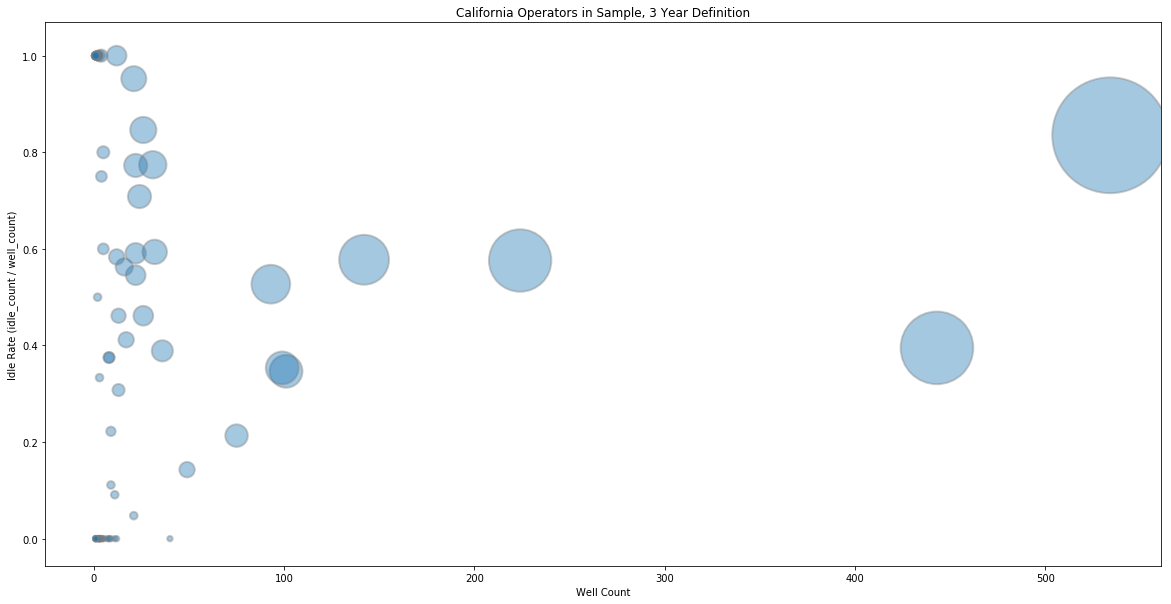

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=(z+1)*30, alpha=.4, edgecolors="grey", linewidth=2)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample, 3 Year Definition')
plt.show()


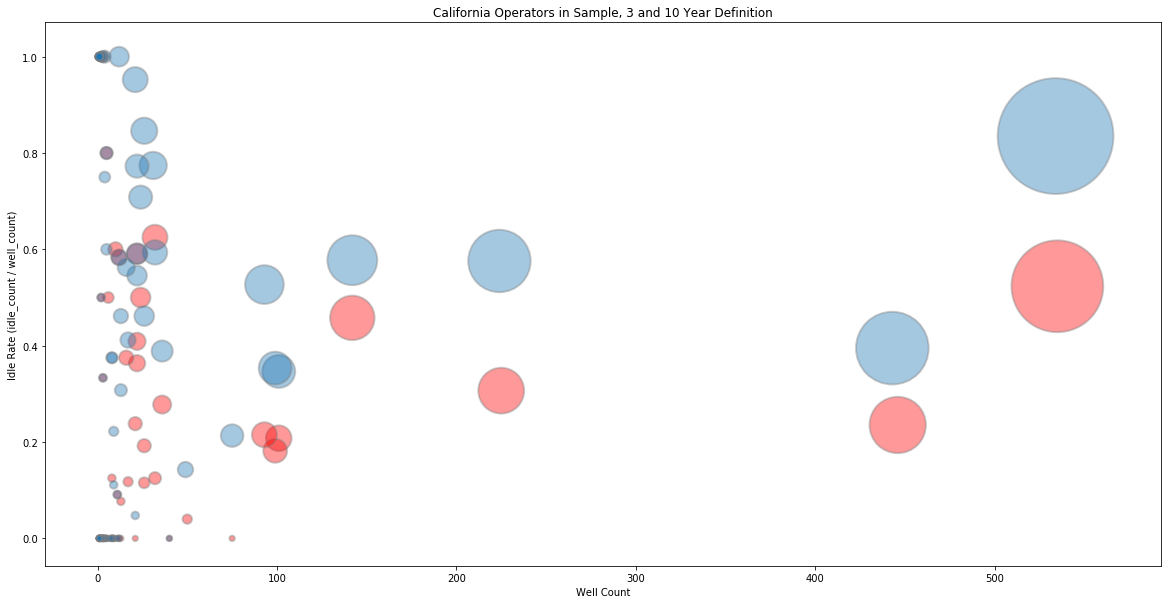

In [40]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x2, y2, s=(z2+1)*30, c='red', alpha=.4, edgecolors="grey", linewidth=2)
ax.scatter(x, y, s=(z+1)*30, alpha=.4, edgecolors="grey", linewidth=2)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample, 3 and 10 Year Definition')
plt.show()

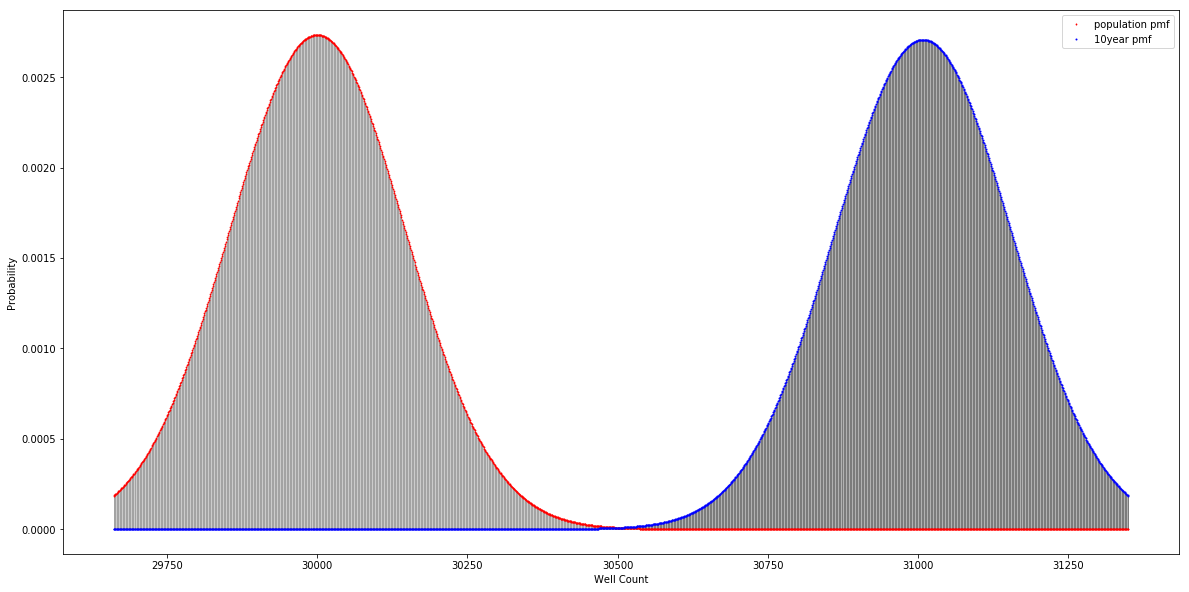

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

xi = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, samp10_p))
ax.plot(xi, binom.pmf(xi, n, p), 'rd', ms=1, label='population pmf')
ax.plot(xi, binom.pmf(xi, n, samp10_p), 'bo', ms=1, label='10year pmf')
ax.vlines(xi, 0, binom.pmf(xi, n, p), lw=1, alpha=.2)
ax.vlines(xi, 0, binom.pmf(xi, n, samp10_p), lw=1, alpha=0.3)
#plt.axvline(x=286.02813261185224+30000)
#ax.hist(y, density=True, bins=60, alpha=.3)
#ax.hist(r, density=True, bins=60, alpha=.3)
plt.xlabel("Well Count")
plt.ylabel("Probability")
ax.legend()
plt.show()


In [38]:
r = stats.binom.rvs(n,samp10_p,size=103450)